In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [117]:
df = pd.read_csv('../udataset/state_data.csv')
df_numeric = df.drop(columns=['state', 'year'])
df_state_year = df[['state', 'year']]
df_numeric

,"agriculture, forestry, fishing and hunting, and mining",construction,manufacturing,wholesale trade,retail trade,"transportation and warehousing, and utilities",information,"finance and insurance, and real estate and rental and leasing","professional, scientific, and management, and administrative and waste management services","educational services, and health care and social assistance","arts, entertainment, and recreation, and accommodation and food services","other services, except public administration",public administration
0,0.142857,0.803030,0.748603,0.787879,0.806452,0.370968,0.25000,0.328571,0.144330,0.440559,0.031579,0.196429,0.161972
1,0.142857,0.742424,0.731844,0.727273,0.806452,0.354839,0.21875,0.314286,0.154639,0.482517,0.036842,0.214286,0.176056
2,0.134921,0.696970,0.709497,0.696970,0.817204,0.370968,0.21875,0.300000,0.159794,0.503497,0.047368,0.214286,0.183099
3,0.134921,0.651515,0.703911,0.636364,0.806452,0.354839,0.18750,0.300000,0.164948,0.538462,0.057895,0.214286,0.183099
4,0.134921,0.606061,0.709497,0.636364,0.817204,0.338710,0.18750,0.300000,0.164948,0.545455,0.068421,0.214286,0.190141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,0.904762,0.818182,0.167598,0.454545,0.698925,0.532258,0.12500,0.071429,0.041237,0.636364,0.194737,0.071429,0.211268
672,0.865079,0.848485,0.167598,0.424242,0.698925,0.516129,0.12500,0.085714,0.046392,0.685315,0.184211,0.107143,0.190141
673,0.825397,0.848485,0.178771,0.424242,0.677419,0.532258,0.15625,0.142857,0.030928,0.741259,0.147368,0.107143,0.197183
674,0.793651,0.863636,0.173184,0.393939,0.731183,0.516129,0.12500,0.157143,0.036082,0.720280,0.136842,0.125000,0.225352


In [118]:
# scaler = StandardScaler()
# standardised_data = scaler.fit_transform(df_numeric)

pca = PCA(n_components = 10)
princ_comps = pca.fit_transform(df_numeric)

print(pca.explained_variance_ratio_)
print(pca.components_)

[0.32894177 0.22224288 0.11572821 0.09274672 0.06640413 0.05387829
 0.03735443 0.02898237 0.0223024  0.01287555]
[[-0.13824412 -0.14534724 -0.46616957 -0.29133431 -0.29521777 -0.09400307
   0.31615269  0.03745305  0.37952919 -0.18900851  0.08898237  0.30619629
   0.42283209]
 [ 0.51449363  0.3837194  -0.43804963 -0.09793484  0.08559609  0.2575558
  -0.21485431 -0.39275423 -0.1915778  -0.11000853  0.16378647 -0.04869929
   0.18572969]
 [-0.17853675  0.29429562 -0.27028352  0.27750788  0.16954062  0.1932323
   0.09085069  0.51067336  0.09374244 -0.43041737  0.33806975 -0.14339923
  -0.25966475]
 [-0.22826985 -0.12887999  0.44179377 -0.00368736 -0.01452368  0.20289607
  -0.10458172 -0.45362921  0.02746429 -0.61931812  0.26141153  0.14978099
   0.0539759 ]
 [-0.39623421  0.00971958 -0.13255285 -0.40075787  0.22212007 -0.34826348
  -0.4611782  -0.0411948  -0.01239141  0.20497885  0.46951208 -0.12828973
  -0.02549526]
 [-0.30199853 -0.15827291 -0.05089845 -0.21929951 -0.11523339  0.81470771


In [119]:
df_princ_comp = pd.DataFrame(princ_comps, columns=[f'PC{i+1}' for i in range(princ_comps.shape[1])])
transformed_df = pd.concat([df_state_year, df_princ_comp], axis=1)
transformed_df.to_csv('../udataset/principle_components.csv', index=False)

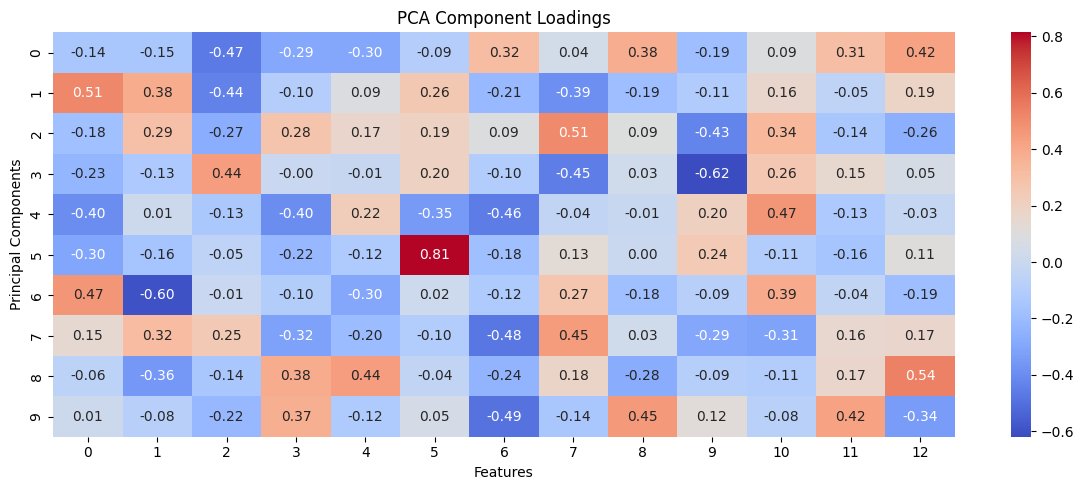

In [120]:
plt.figure(figsize=(12, 5))  # You can adjust the size as needed
sns.heatmap(pca.components_, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('PCA Component Loadings')
plt.ylabel('Principal Components')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

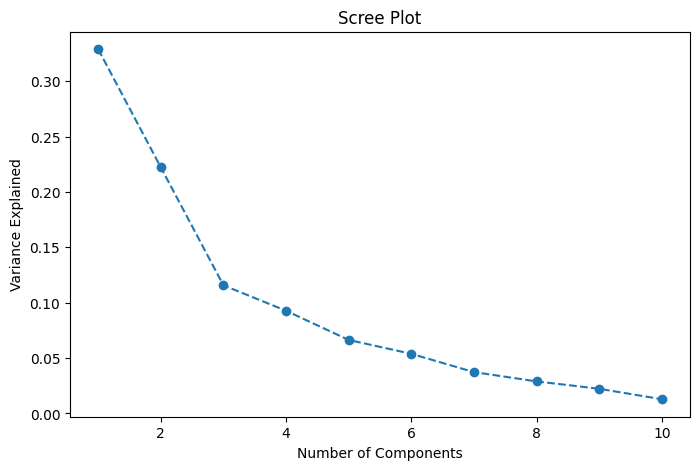

In [121]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.show()

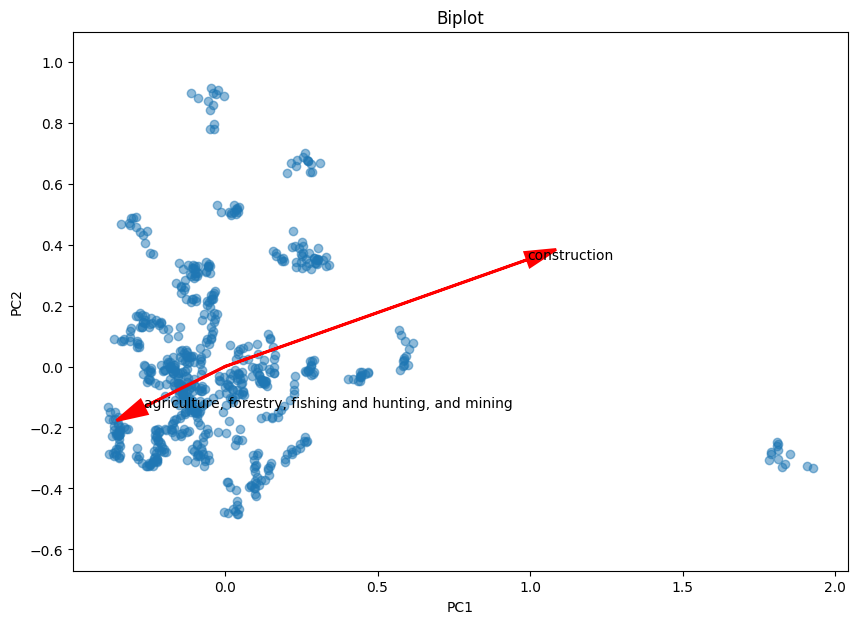

In [122]:
scores = pca.transform(df_numeric)

plt.figure(figsize=(10,7))
plt.scatter(scores[:, 0], scores[:, 1], alpha=0.5)
for i, v in enumerate(pca.components_[0:2, :]):
    plt.arrow(0, 0, v[0]*max(scores[:,0]), v[1]*max(scores[:,1]), head_width=0.05, head_length=0.1, linewidth=2, color='red')
    plt.text(v[0]*max(scores[:,0]), v[1]*max(scores[:,1]), df_numeric.columns[i], color='black')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot')
plt.axis('equal')
plt.show()

/tmp/ipykernel_392528/961088523.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


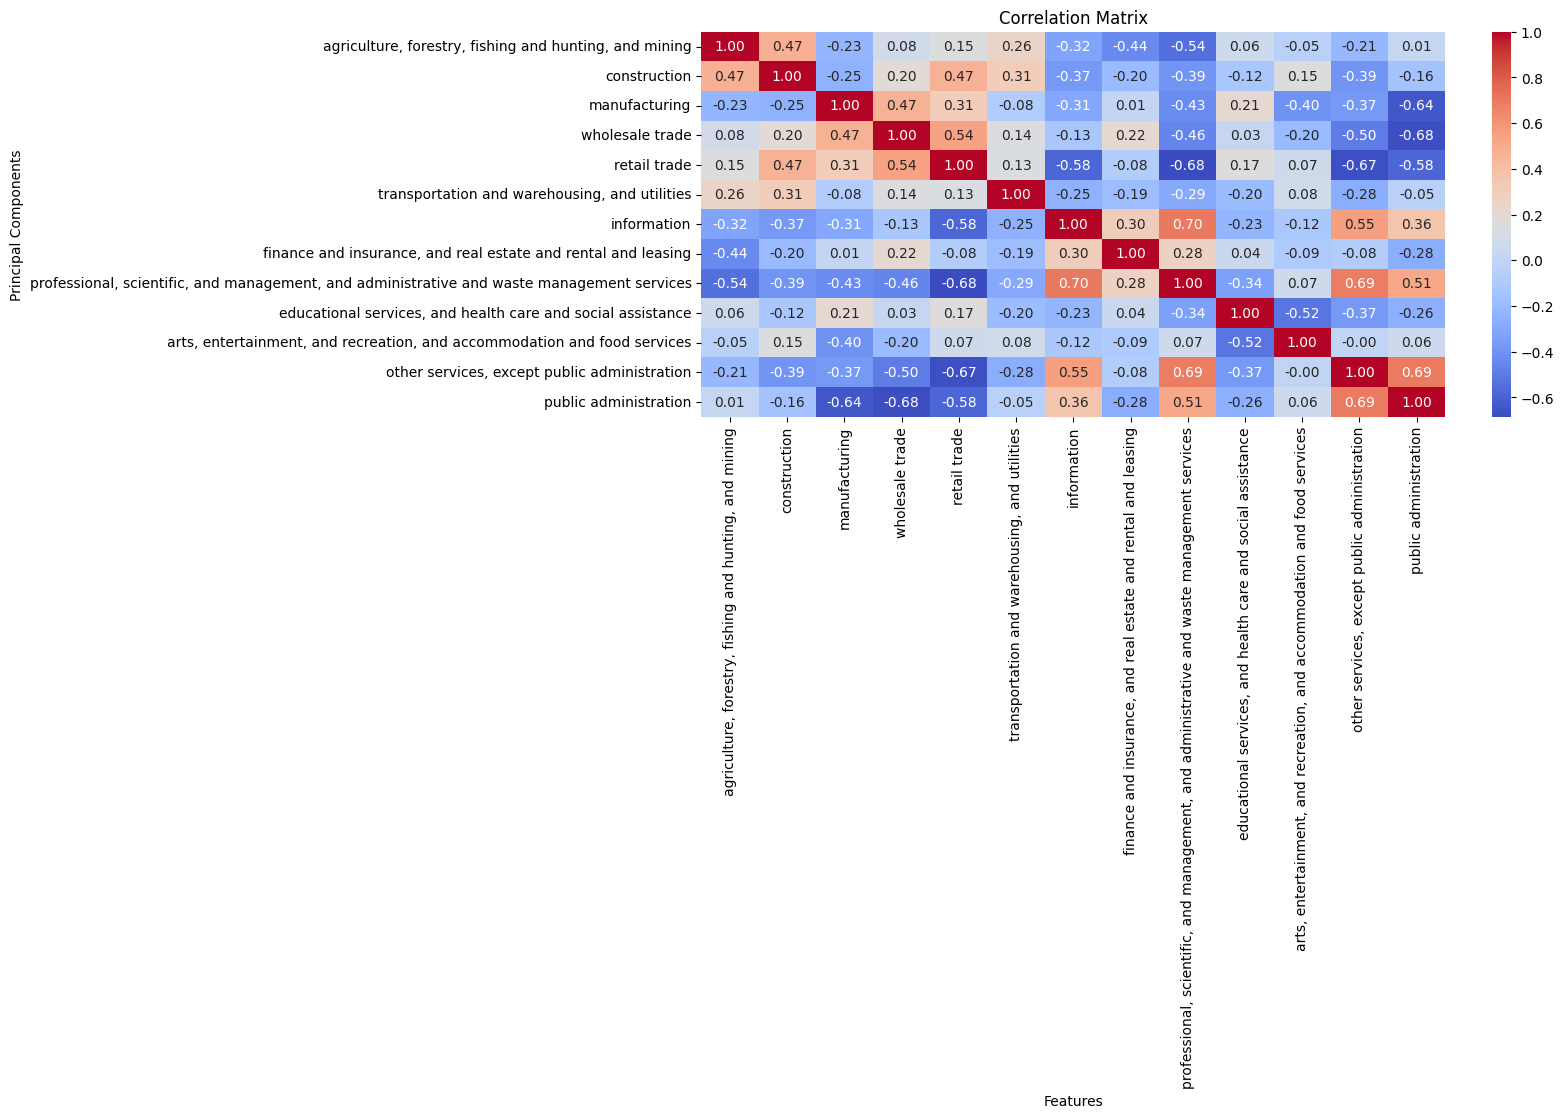

In [123]:
plt.figure(figsize=(12, 5))  # You can adjust the size as needed
corr_mat = df_numeric.corr()
sns.heatmap(corr_mat, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.ylabel('Principal Components')
plt.xlabel('Features')
plt.tight_layout()
plt.show()